# Cellular Automata

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Implementation

In [90]:
powers_of_two = np.array([[4], [2], [1]])  # shape (3, 1)

def step(x, rule_binary):
    """Makes one step in the cellular automaton.

    Args:
        x (np.array): current state of the automaton
        rule_binary (np.array): the update rule

    Returns:
        np.array: updated state of the automaton
    """
    x_shift_right = np.roll(x, 1)  # circular shift to right (1 place) --> Elements that roll beyond the last position are re-introduced at the first.
    x_shift_left = np.roll(x, -1)  # circular shift to left
    y = np.vstack((x_shift_right, x, x_shift_left)).astype(np.int8)  # stack row-wise, shape (3, cols)
    z = np.sum(powers_of_two * y, axis=0).astype(np.int8)  # LCR pattern as number

    return rule_binary[7 - z]

In [124]:
def cellular_automaton(rule_number, size, steps,
                       init_cond='random', impulse_pos='center'):
    """Generate the state of an elementary cellular automaton after a pre-determined
    number of steps starting from some random state.

    Args:
        rule_number (int): the number of the update rule to use
        size (int): number of cells in the row
        steps (int): number of steps to evolve the automaton
        init_cond (str): either `random` or `impulse`. If `random` every cell
        in the row is activated with prob. 0.5. If `impulse` only one cell
        is activated.
        impulse_pos (str): if `init_cond` is `impulse`, activate the
        left-most, central or right-most cell.

    Returns:
        np.array: final state of the automaton
    """
    assert 20 <= rule_number <= 20000 # test if rule_number is btw 0 and 255
    assert init_cond in ['random', 'impulse'] # test if one (impulse) or more (random) cells are activated
    assert impulse_pos in ['left', 'center', 'right'] # test which cell is activated
    
    rule_binary_str = np.binary_repr(rule_number, width=8) # Return the binary representation of the rule_number as a string, 8 bits
    rule_binary = np.array([int(ch) for ch in rule_binary_str], dtype=np.int8) # Make an array of integers of it
    x = np.zeros((steps, size), dtype=np.int8) # x is an array of 0s of shape [steps, size] 
    
    if init_cond == 'random':  # random init of the first step --> if every cell in the row is activated with prob 0.5
        x[0, :] = np.array(np.random.rand(size) < 0.5, dtype=np.int8) # fill array with random numbers under 0.5

    if init_cond == 'impulse':  # starting with an initial impulse --> if one cell is activated
        if impulse_pos == 'left': # moving to the left
            x[0, 0] = np.random.randint(0,130) # activate first cell on the left
        elif impulse_pos == 'right': # moving to the right
            x[0, size - 1] = 2 # activate last cell (the right one)
        else:
            x[0, size // 2] = np.random.randint(0,130) # otherwise activate cell in the center
    
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_binary) # do next step
    
    return x

## Visualization

In [125]:
rule_number = np.random.randint(20, 20000)  # select the update rule 60
size = 130  # number of cells in one row 100
steps = 100  # number of time steps 63
init_cond='random'  # start with only one cell impulse
impulse_pos='center'  # start with the left-most cell left

x = cellular_automaton(rule_number, size, steps, init_cond, impulse_pos) # compute the cells

In [126]:
print(size, "size")
print(rule_number, "rule_number")
print(steps, "time steps")

130 size
19651 rule_number
100 time steps


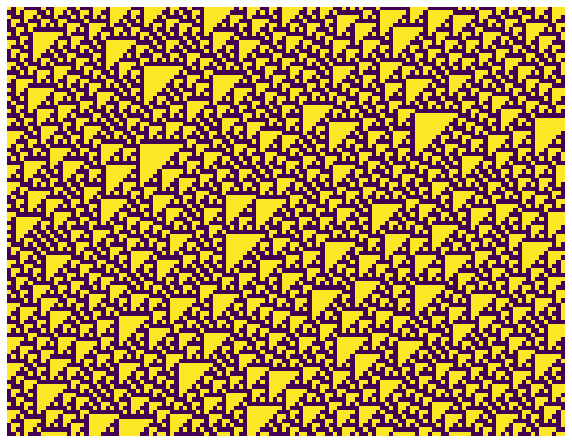

In [127]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes()
ax.set_axis_off()

ax.imshow(x, interpolation='none') #RdPu
plt.savefig('elementary_cellular_automaton.png', dpi=300, bbox_inches='tight')

## Animation

In [ ]:
rule_number = 90  # select the update rule
size = 100  # number of cells in one row
steps = 500  # number of time steps
init_cond='impulse'  # start with only one cell
impulse_pos='center'  # start with the central cell

x = cellular_automaton(rule_number, size, steps, init_cond, impulse_pos)

[gif @ 0x564672602600] GIF muxer supports only a single video GIF stream.
Could not write header for output file #0 (incorrect codec parameters ?): Invalid argument
Error initializing output stream 0:0 -- 



CalledProcessError: ignored

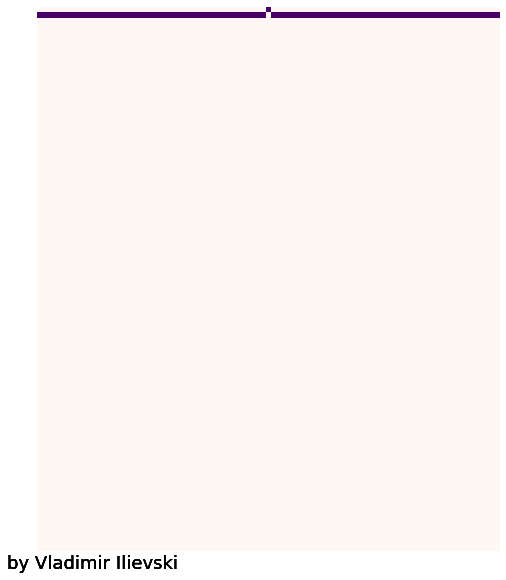

In [ ]:
steps_to_show = 100  # number of steps to show in the animation window
iterations_per_frame = 1  # how many steps to show per frame
frames = int(steps // iterations_per_frame)  # number of frames in the animation
interval=50  # interval in ms between consecutive frames

fig = plt.figure(figsize=(10, 10))

ax = plt.axes()
ax.set_axis_off()

def animate(i):
    ax.clear()  # clear the plot
    ax.set_axis_off()  # disable axis
    
    Y = np.zeros((steps_to_show, size), dtype=np.int8)  # initialize with all zeros
    upper_boundary = (i + 1) * iterations_per_frame  # window upper boundary
    lower_boundary = 0 if upper_boundary <= steps_to_show else upper_boundary - steps_to_show  # window lower bound.
    for t in range(lower_boundary, upper_boundary):  # assign the values
        Y[t - lower_boundary, :] = x[t, :]
    
    img = ax.imshow(Y, interpolation='none',cmap='RdPu')
    plt.gcf().text(0.15, 0.1, 'by Vladimir Ilievski', fontsize=18, fontfamily='Verdana')
    return [img]
    
# call the animator
anim = animation.FuncAnimation(fig, animate, frames=frames, interval=50, blit=True)
anim.save('elementary_cellular_automaton.gif') 